In [24]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')


!kaggle datasets download -d mirichoi0218/insurance -p ./data --unzip

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0




  0%|          | 0.00/16.0k [00:00<?, ?B/s]
100%|██████████| 16.0k/16.0k [00:00<00:00, 2.97MB/s]


In [25]:
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [28]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [34]:
df.shape

(1338, 7)

In [71]:
# Check how many of the entries are of age younger than 25
condition = df['age'] < 25
print(df[condition])

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
12     23    male  34.400         0     no  southwest   1826.84300
15     19    male  24.600         1     no  southwest   1837.23700
17     23    male  23.845         0     no  northeast   2395.17155
...   ...     ...     ...       ...    ...        ...          ...
1328   23  female  24.225         2     no  northeast  22395.74424
1331   23  female  33.400         0     no  southwest  10795.93733
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[278 rows x 7 columns]


In [56]:
# Determining if there are any NULL values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [76]:
# Finding Duplicate Rows:
duplicates = df[df.duplicated()]
print(duplicates)

# Finding the number of duplicates:
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
Number of Duplicate Rows: 1


In [80]:
# Removing the Duplicate Rows:
df_cleaned = df.drop_duplicates()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Univariate Analysis for Numerical Features

### Distribution Plots: Scatterplots/Histograms

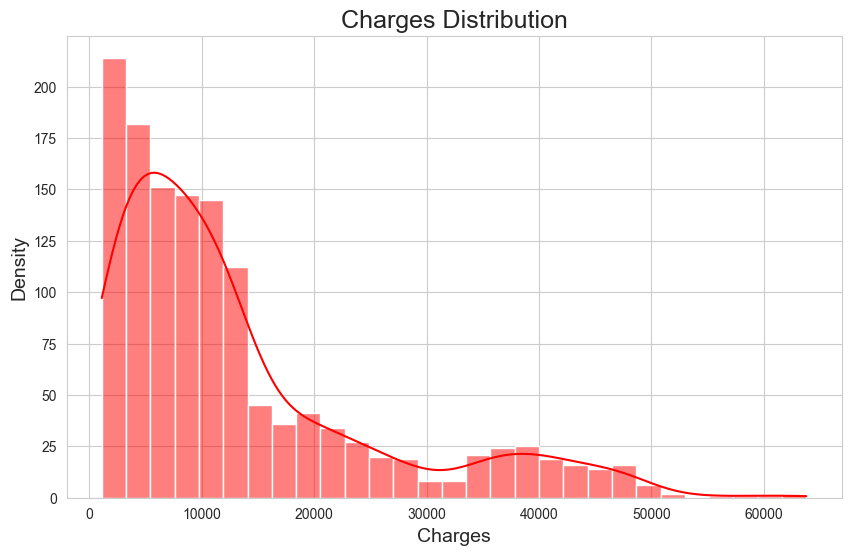

In [122]:
# Charges Distribution
plt.figure(figsize=(10,6))
sns.histplot(df.charges,color='r',kde=True)
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()
plt.show()

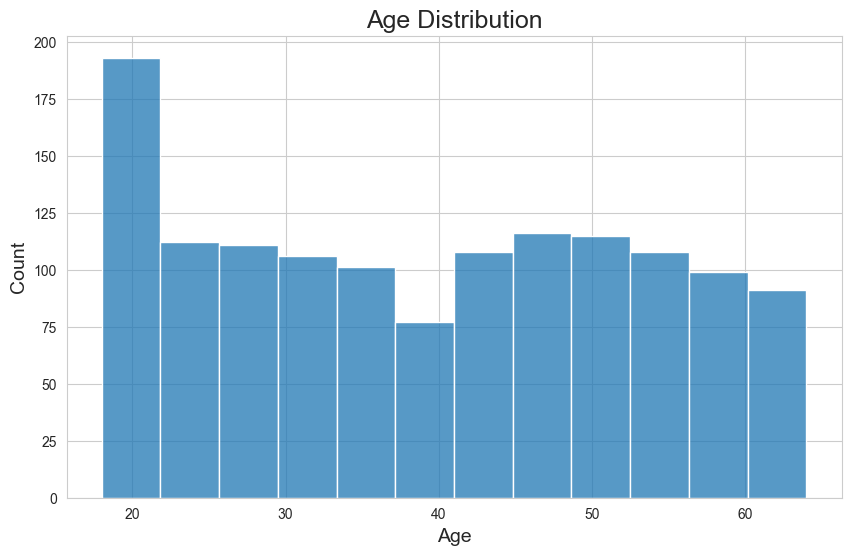

In [123]:
# Age Distribution Visualized
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

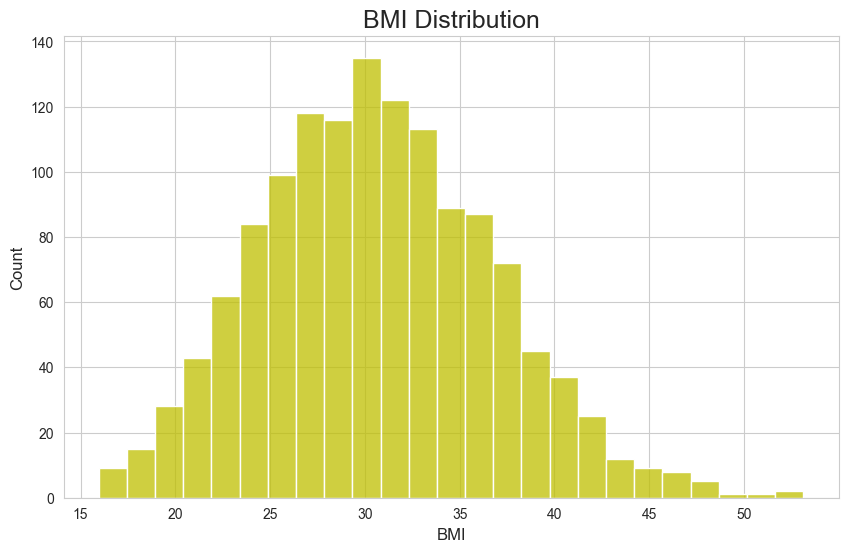

In [124]:
# BMI Distribution
plt.figure(figsize=(10,6))
sns.histplot(df.bmi, color='y')
plt.title('BMI Distribution', size=18)
plt.xlabel('BMI', size=12)
plt.ylabel('Count', size=12)
plt.show()

### Boxplots and IQR

BOXPLOTS: 
A boxplot is a standardized way of displaying the dataset based on a five-number summary: the *minimum*, the *maximum*, the sample *median*, and the first and third *quartiles*.

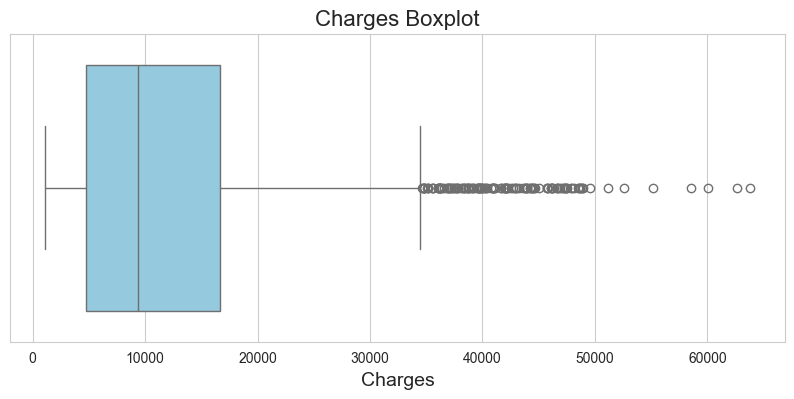

In [125]:
# Boxplot of Charges Distribution
plt.figure(figsize=(10,4))
sns.boxplot(x=df.charges, color='skyblue', orient='h')  # Horizontal boxplot
plt.title('Charges Boxplot', fontsize=16)
plt.xlabel('Charges', fontsize=14)
plt.show()

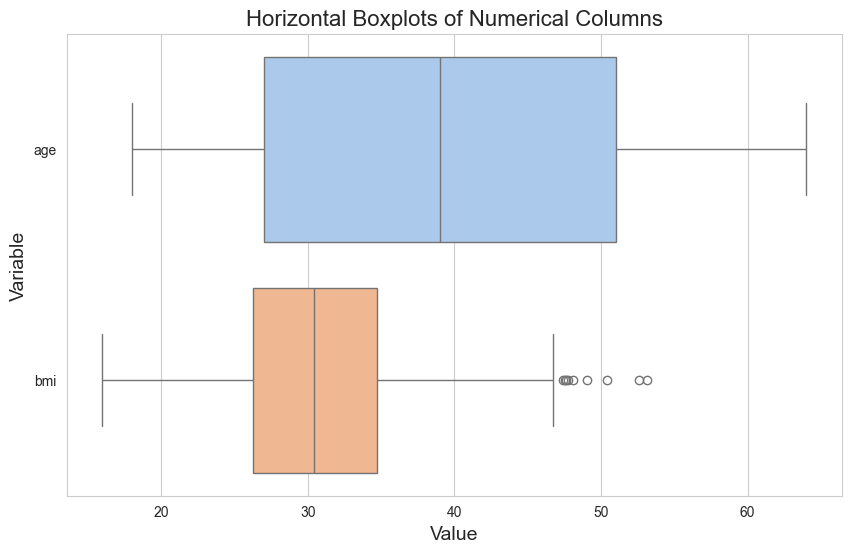

In [126]:
# How to show multiple Boxplots on a single plot
# Select numerical columns
num_cols = ['age', 'bmi']

# Melt the DataFrame to long format
df_melted = df[num_cols].melt(var_name='Variable', value_name='Value')

plt.figure(figsize=(10,6))

# Horizontal boxplot
sns.boxplot(x='Value', y='Variable', data=df_melted, palette='pastel', orient='h')

plt.title('Horizontal Boxplots of Numerical Columns', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Variable', fontsize=14)

plt.show()

In [127]:
# Removing Outliers using the IQR Method
# How to calculate the IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11911.37345


In [128]:
# Using IQR to show the outliers
outliers = df[(df['charges'] < Q1 - 1.5*IQR) | (df['charges'] > Q3 + 1.5*IQR)]
outliers.info()

# Using IQR to REMOVE the outliers
df_no_outliers = df[(df['charges'] >= Q1 - 1.5*IQR) & (df['charges'] <= Q3 + 1.5*IQR)]
df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 14 to 1323
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       139 non-null    int64  
 1   sex       139 non-null    object 
 2   bmi       139 non-null    float64
 3   children  139 non-null    int64  
 4   smoker    139 non-null    object 
 5   region    139 non-null    object 
 6   charges   139 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 8.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1198 non-null   int64  
 1   sex       1198 non-null   object 
 2   bmi       1198 non-null   float64
 3   children  1198 non-null   int64  
 4   smoker    1198 non-null   object 
 5   region    1198 non-null   object 
 6   charges   1198 non-null   float64
dtypes: float64(2), int64(2), obje

# Univariate Analysis for Categorical Features

### Bar Charts

Bar Charts are commonly used to visualize categorical features

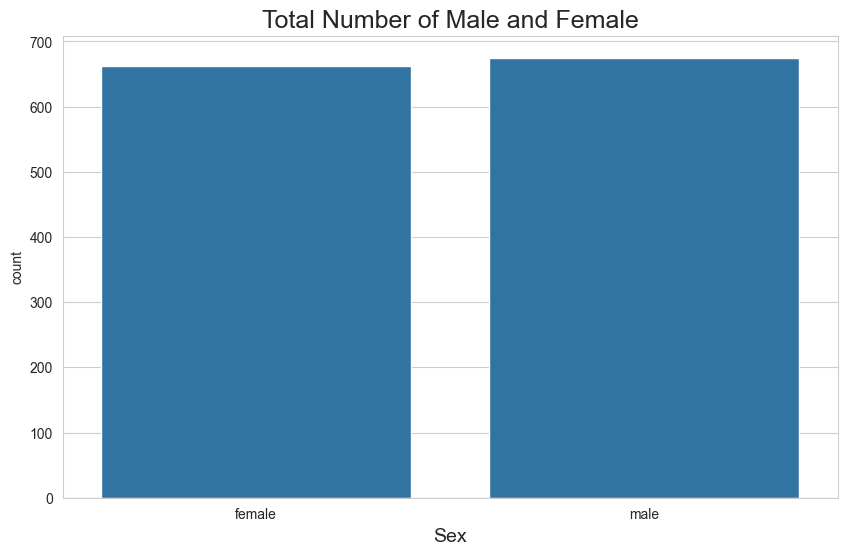

In [134]:
# Count of Male/Females
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

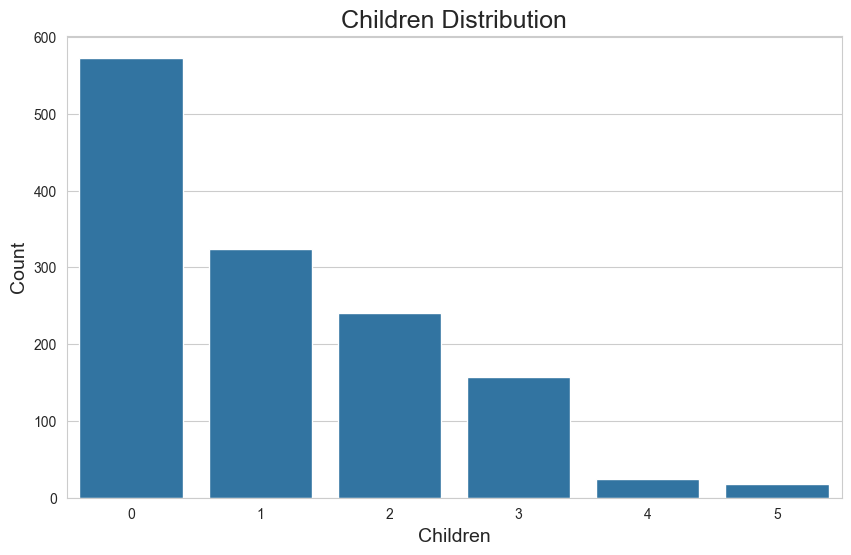

In [139]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution',size=18)
plt.xlabel('Children',size=14)
plt.ylabel('Count',size=14)
plt.show()

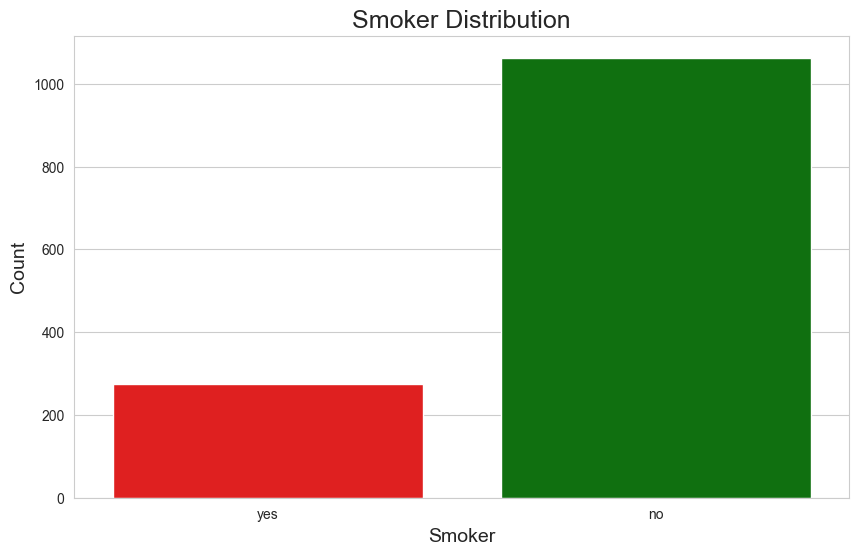

smoker
no     1063
yes     274
Name: count, dtype: int64


In [143]:
# Smokers vs Non-Smokers
plt.figure(figsize = (10,6))
sns.countplot(x = 'smoker', data= df, palette=['red','green'])
plt.title('Smoker Distribution',size=18)
plt.xlabel('Smoker',size=14)
plt.ylabel('Count',size=14)
plt.show()

# Show exact counts
print(df.smoker.value_counts())

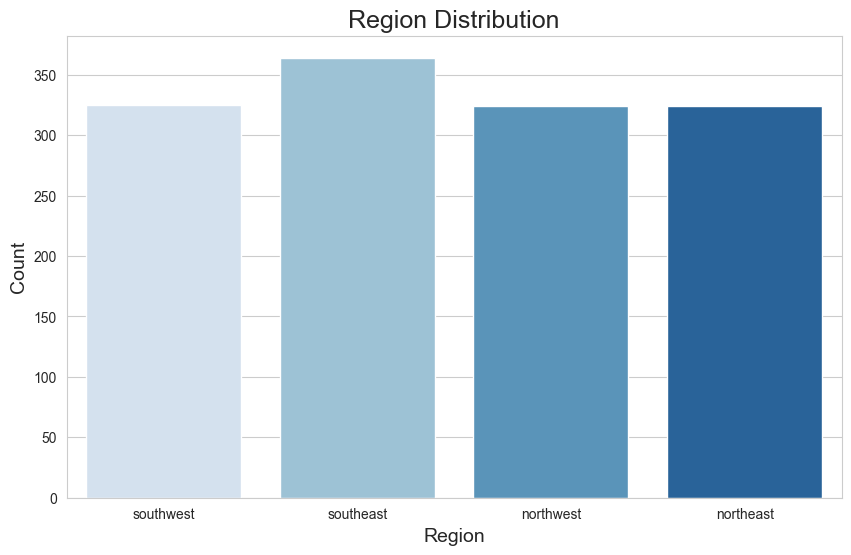

In [145]:
# Regions Distribution
plt.figure(figsize = (10,6))
sns.countplot(x = 'region', data = df, palette='Blues')
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show()